Title: Regression Models

Ridge & Lasso Regression (Regularization Techniques)


Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

In [3]:
# Use Ridge regression on a dataset with multicollinearity to compare results with linear regression

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Create a dataset with multicollinearity
np.random.seed(0)
n_samples = 100
X1 = np.random.rand(n_samples)
X2 = X1 + np.random.normal(0, 0.01, n_samples)  # Highly correlated with X1
X3 = np.random.rand(n_samples)
y = 3*X1 + 2*X2 + 1.5*X3 + np.random.normal(0, 0.1, n_samples)

df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
X = df[['X1', 'X2', 'X3']]

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Linear Regression MSE:", mean_squared_error(y, y_pred_lin))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
print("Ridge Regression Coefficients:", ridge.coef_)
print("Ridge Regression MSE:", mean_squared_error(y, y_pred_ridge))

Linear Regression Coefficients: [1.44850518 3.58128087 1.44164529]
Linear Regression MSE: 0.009569963574875757
Ridge Regression Coefficients: [2.36747206 2.38603565 1.32512988]
Ridge Regression MSE: 0.01787663696831903


Task 2: Implement Lasso regression and observe effect on feature selection in feature rich data.

In [2]:
# Implement Lasso regression and observe effect on feature selection in feature rich data

import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso

# Create a feature-rich dataset (many features, some irrelevant)
np.random.seed(42)
n_samples = 100
n_features = 15

# Only first 3 features are truly predictive
X = np.random.randn(n_samples, n_features)
true_coefs = np.array([3, -2, 1.5] + [0]*(n_features-3))
y = X @ true_coefs + np.random.normal(0, 0.5, n_samples)

df = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(n_features)])

# Fit Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(df, y)

print("Lasso Regression Coefficients:")
for name, coef in zip(df.columns, lasso.coef_):
    print(f"{name}: {coef:.3f}")

# Observe which features have coefficients close to zero (feature selection effect)
num_selected = np.sum(lasso.coef_ != 0)
print(f"\nNumber of features selected (non-zero coefficients): {num_selected} out of {n_features}")

Lasso Regression Coefficients:
X1: 2.818
X2: -1.900
X3: 1.503
X4: 0.000
X5: 0.000
X6: -0.000
X7: 0.000
X8: -0.000
X9: 0.000
X10: 0.000
X11: 0.000
X12: 0.000
X13: 0.000
X14: 0.000
X15: -0.000

Number of features selected (non-zero coefficients): 3 out of 15



Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

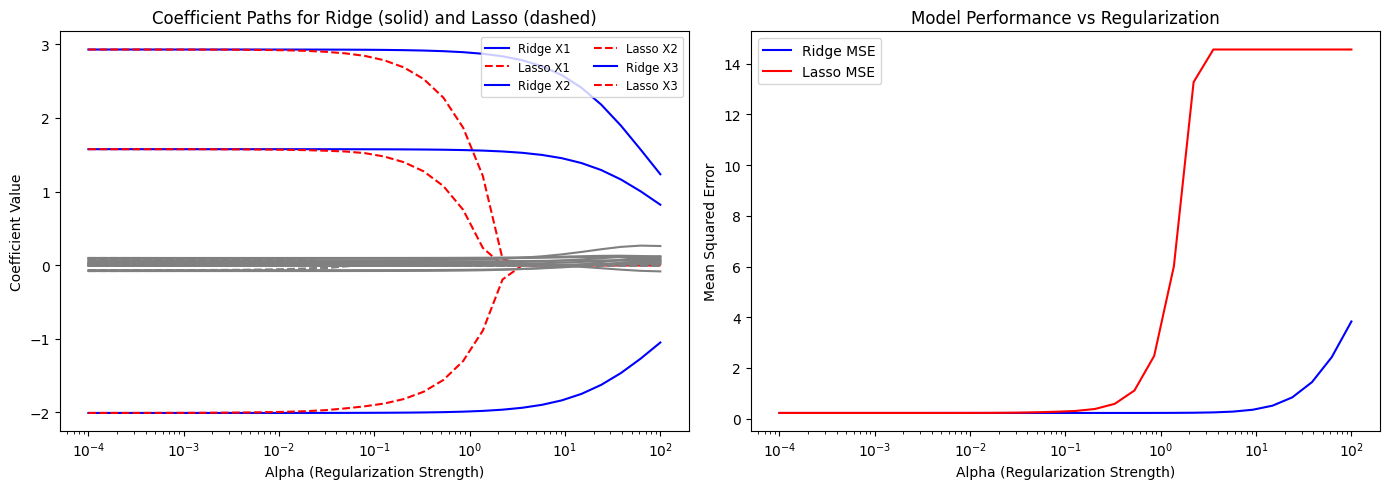

In [1]:
# Visualize regularization effects with model complexity and performance metrics comparison

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

# Use the same feature-rich dataset as before
np.random.seed(42)
n_samples = 100
n_features = 15
X = np.random.randn(n_samples, n_features)
true_coefs = np.array([3, -2, 1.5] + [0]*(n_features-3))
y = X @ true_coefs + np.random.normal(0, 0.5, n_samples)

alphas = np.logspace(-4, 2, 30)
ridge_coefs = []
lasso_coefs = []
ridge_mse = []
lasso_mse = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)
    ridge_mse.append(mean_squared_error(y, ridge.predict(X)))
    
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)
    lasso_mse.append(mean_squared_error(y, lasso.predict(X)))

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(14, 5))

# Coefficient paths
plt.subplot(1, 2, 1)
for i in range(n_features):
    plt.plot(alphas, ridge_coefs[:, i], label=f'Ridge X{i+1}' if i < 3 else None, color='blue' if i < 3 else 'gray', linestyle='-')
    plt.plot(alphas, lasso_coefs[:, i], label=f'Lasso X{i+1}' if i < 3 else None, color='red' if i < 3 else 'gray', linestyle='--')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Paths for Ridge (solid) and Lasso (dashed)')
plt.legend(loc='upper right', ncol=2, fontsize='small')

# MSE comparison
plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_mse, label='Ridge MSE', color='blue')
plt.plot(alphas, lasso_mse, label='Lasso MSE', color='red')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance vs Regularization')
plt.legend()

plt.tight_layout()
plt.show()